# Weight-Height Polynomial Dataset



In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset
df = pd.read_csv('weight_height_polynomial_dataset.csv')
df.head()

,Weight,Height
0,69.963210,96.644532
1,116.057145,196.156340
2,98.559515,145.862047
3,87.892679,121.157923
4,52.481491,68.971292


In [3]:
df.describe()

,Weight,Height
count,50.000000,50.000000
mean,75.673912,111.473633
std,23.110656,39.493803
min,41.646760,68.971292
25%,54.701360,79.966731
50%,74.883900,98.819101
75%,91.988395,129.709758
max,117.592788,202.663424


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  50 non-null     float64
 1   Height  50 non-null     float64
dtypes: float64(2)
memory usage: 932.0 bytes


In [5]:
X, y = np.array(df['Weight']), np.array(df['Height'])
x_min, x_max = np.min(X), np.max(X)
X_continues = np.linspace(x_min, x_max, 1000)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [6]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (35,)
y_train shape: (35,)
X_test shape: (15,)
y_test shape: (15,)


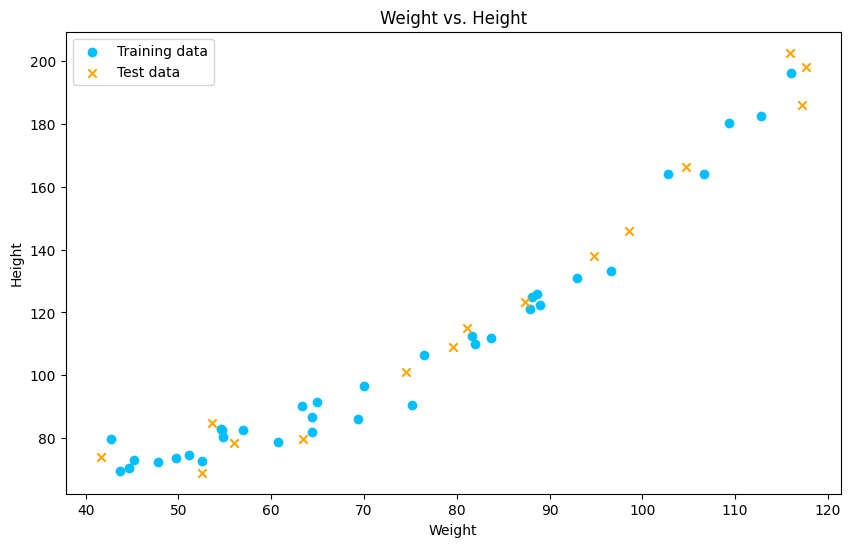

In [7]:
plt.figure(figsize=(10, 6))
plt.title('Weight vs. Height')
plt.scatter(X_train, y_train, color='deepskyblue', label='Training data')
plt.scatter(X_test, y_test, color='orange', label='Test data', marker='x')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.show()

In [8]:
class PolynomialRegression:
    def __init__(self, degree: int) -> None:
        self.linear = LinearRegression()
        self.transformation = PolynomialFeatures(degree=degree)
    
    def fit(self, X: np.array, y: np.array) -> None:
        X_ = self.transformation.fit_transform(X)
        self.linear.fit(X_, y)

    def predict(self, X: np.array) -> np.array:
        X_ = self.transformation.fit_transform(X)
        return self.linear.predict(X_)

In [9]:
# Creating models
degrees = [1, 2, 3, 4]
models = {d: PolynomialRegression(d) for d in degrees}

# Train models
for _, model in models.items():
    model.fit(X_train.reshape(-1, 1), y_train)

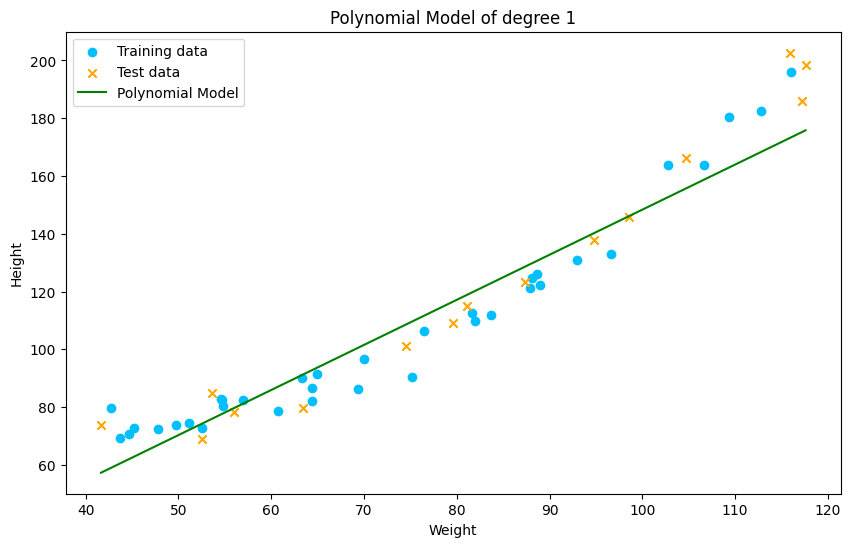

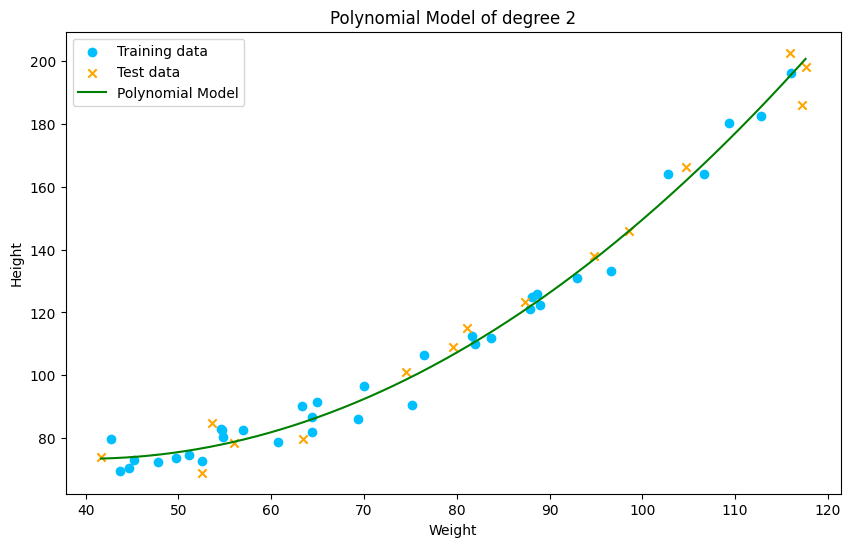

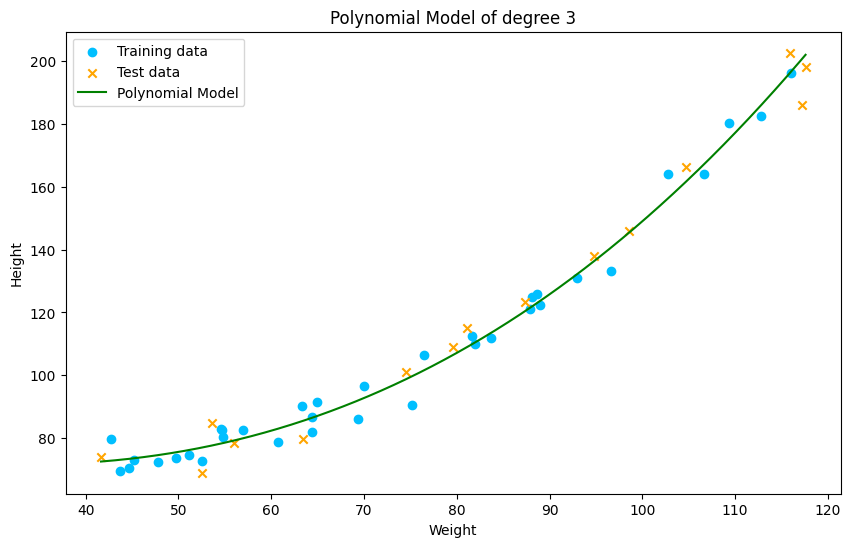

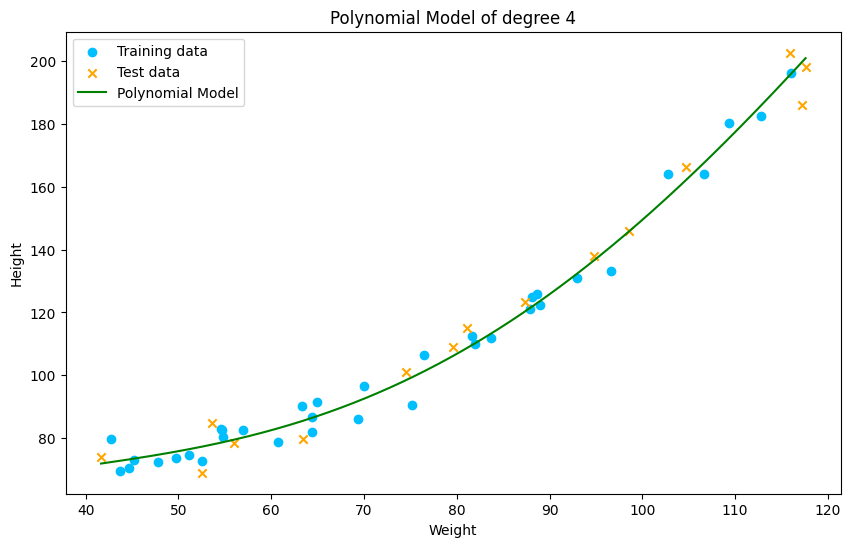

In [10]:
# Plotting models
for degree, model in models.items():
    fig, ax = plt.subplots(figsize=(10, 6))
    y_continues = model.predict(X_continues.reshape(-1, 1))
    ax.set_title(f'Polynomial Model of degree {degree}') 
    ax.set_xlabel('Weight')
    ax.set_ylabel('Height') 
    ax.scatter(X_train, y_train, color='deepskyblue', label='Training data')
    ax.scatter(X_test, y_test, color='orange', label='Test data', marker='x')
    ax.plot(X_continues, y_continues, color='green', label='Polynomial Model')
    ax.legend()

In [11]:
def measure_bias_var_mse(model: PolynomialRegression,
                         X_train,
                         X_test,
                         y_train,
                         y_test,
                         n_samples: int = 200):
    pred_all = []
    for _ in range(n_samples):
        X_boot, y_boot = resample(X_train, y_train, replace=True)
        model.fit(X_boot.reshape(-1, 1), y_boot)
        y_pred = model.predict(X_test.reshape(-1, 1))
        pred_all.append(y_pred)
    pred_all = np.array(pred_all)
    
    # Expected prediction model    
    expected_prediction = np.mean(pred_all, axis=0)

    # Bias
    bias = np.mean((expected_prediction - y_test) ** 2)

    # Variance
    var = np.mean((expected_prediction - pred_all) ** 2)

    # mse
    mse = np.mean((pred_all - y_test) ** 2)
    return bias, var, mse

In [12]:
measures = {d: measure_bias_var_mse(model, X_train, X_test, y_train, y_test) for d, model in models.items()}

biases = [round(measures[d][0], 2) for d in measures]
variances = [round(measures[d][1], 2) for d in measures]
mses = [round(measures[d][2], 2) for d in measures]

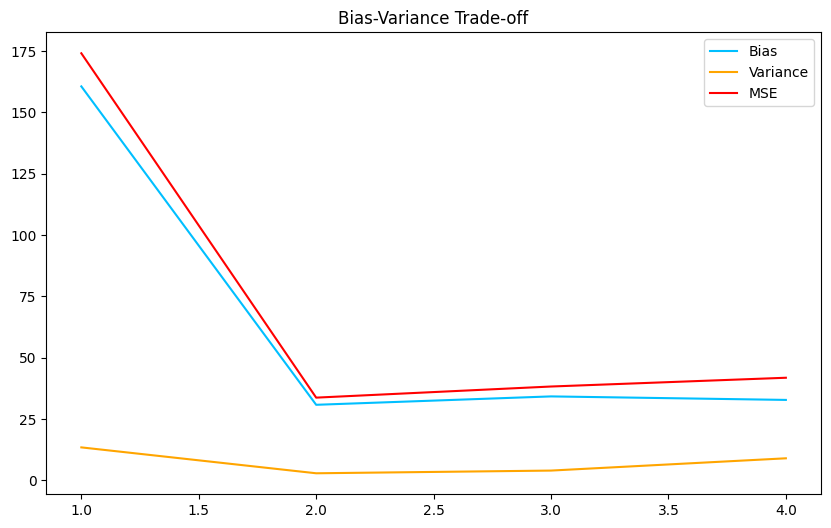

In [13]:
plt.figure(figsize=(10, 6))
plt.title('Bias-Variance Trade-off')
plt.plot(degrees, biases, label='Bias', color='deepskyblue')
plt.plot(degrees, variances, label='Variance', color='orange')
plt.plot(degrees, mses, label='MSE', color='red')
plt.legend()
plt.show()

In [14]:
for degree, (bias, var, mse) in measures.items():
    print(f'Model degree: {degree}\tBias: {round(bias,2)}\tVariance: {round(var,2)}\tMSE: {round(mse,2)}')

Model degree: 1	Bias: 160.56	Variance: 13.48	MSE: 174.05
Model degree: 2	Bias: 30.83	Variance: 2.93	MSE: 33.75
Model degree: 3	Bias: 34.25	Variance: 4.03	MSE: 38.28
Model degree: 4	Bias: 32.82	Variance: 9.03	MSE: 41.85


In [15]:
# Choosing the best model
model = models[2]

# Generate predictions
y_continues = model.predict(X_continues.reshape(-1, 1))
y_pred = model.predict(X_test.reshape(-1, 1))

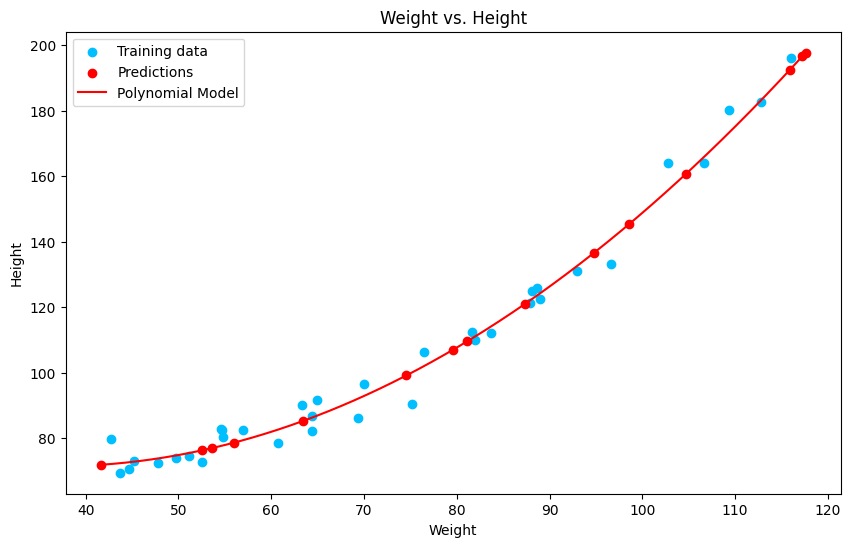

In [16]:
plt.figure(figsize=(10, 6))
plt.title('Weight vs. Height')
plt.scatter(X_train, y_train, color='deepskyblue', label='Training data')
plt.scatter(X_test, y_pred, color='red', label='Predictions', marker='o')
plt.plot(X_continues, y_continues, label='Polynomial Model', color='red')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.show()

In [17]:
# Calculation of the R^2 score to evaluate performance
r2 = r2_score(y_test, y_pred)
print(f'R2 score: {r2}')

R2 score: 0.9852569186673319
